In [1]:
!pip install ydata-profiling

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 398.7/398.7 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 85.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 41.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 3.3 MB/s eta 0:00:00


In [3]:
import pandas as pd

In [32]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

import random

SEED = 42

random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed_all(SEED)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [4]:
df = pd.read_csv('/home/covtype.csv')

In [5]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [7]:
from ydata_profiling import ProfileReport

In [8]:
profile = ProfileReport(
    df,
    title="Dataset Profiling Report",
    explorative=True  # gives more interactive analysis
)

In [11]:
profile.to_file("/home/dataset_profile_report.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [13]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    precision_recall_fscore_support
)

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)


In [14]:
print("Shape (rows, columns):", df.shape)

Shape (rows, columns): (581012, 55)


In [15]:
print("\nData types:")
print(df.dtypes)


Data types:
Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Wilderness_Area1                      int64
Wilderness_Area2                      int64
Wilderness_Area3                      int64
Wilderness_Area4                      int64
Soil_Type1                            int64
Soil_Type2                            int64
Soil_Type3                            int64
Soil_Type4                            int64
Soil_Type5                            int64
Soil_Type6                            int64
Soil_Type7                            int64
Soil_Type8                            int64
Soil_Type9         

In [16]:
print("\nMissing values per column:")
print(df.isna().sum())



Missing values per column:
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11 

In [52]:
print("\nBasic stats for numeric columns:")
display(df.describe().T)


Basic stats for numeric columns:


,count,mean,std,min,25%,50%,75%,max
Elevation,581012.0,2959.365301,279.984734,1859.0,2809.0,2996.0,3163.0,3858.0
Aspect,581012.0,155.656807,111.913721,0.0,58.0,127.0,260.0,360.0
Slope,581012.0,14.103704,7.488242,0.0,9.0,13.0,18.0,66.0
Horizontal_Distance_To_Hydrology,581012.0,269.428217,212.549356,0.0,108.0,218.0,384.0,1397.0
Vertical_Distance_To_Hydrology,581012.0,46.418855,58.295232,-173.0,7.0,30.0,69.0,601.0
Horizontal_Distance_To_Roadways,581012.0,2350.146611,1559.254870,0.0,1106.0,1997.0,3328.0,7117.0
Hillshade_9am,581012.0,212.146049,26.769889,0.0,198.0,218.0,231.0,254.0
Hillshade_Noon,581012.0,223.318716,19.768697,0.0,213.0,226.0,237.0,254.0
Hillshade_3pm,581012.0,142.528263,38.274529,0.0,119.0,143.0,168.0,254.0
Horizontal_Distance_To_Fire_Points,581012.0,1980.291226,1324.195210,0.0,1024.0,1710.0,2550.0,7173.0



Unique cover types: [5 2 1 7 3 6 4]

Class counts:


,count
Cover_Type,
1,211840
2,283301
3,35754
4,2747
5,9493
6,17367
7,20510


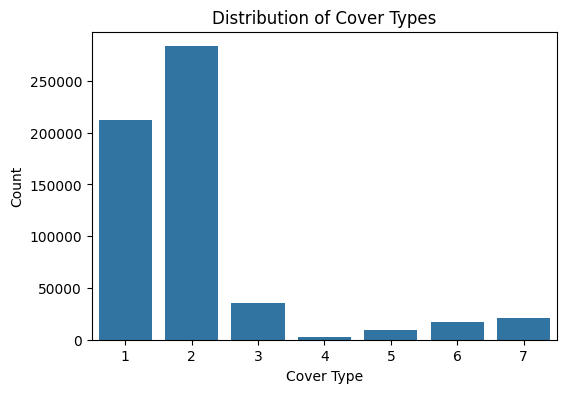

In [18]:
# Make sure target column name matches your file (here 'Cover_Type')
target_col = "Cover_Type"

print("\nUnique cover types:", df[target_col].unique())
print("\nClass counts:")
class_counts = df[target_col].value_counts().sort_index()
display(class_counts)

plt.figure(figsize=(6,4))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.xlabel("Cover Type")
plt.ylabel("Count")
plt.title("Distribution of Cover Types")
plt.show()

In [19]:
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 0


In [20]:
numeric_cols = [
    "Elevation",
    "Aspect",
    "Slope",
    "Horizontal_Distance_To_Hydrology",
    "Vertical_Distance_To_Hydrology",
    "Horizontal_Distance_To_Roadways",
    "Hillshade_9am",
    "Hillshade_Noon",
    "Hillshade_3pm",
    "Horizontal_Distance_To_Fire_Points"
]

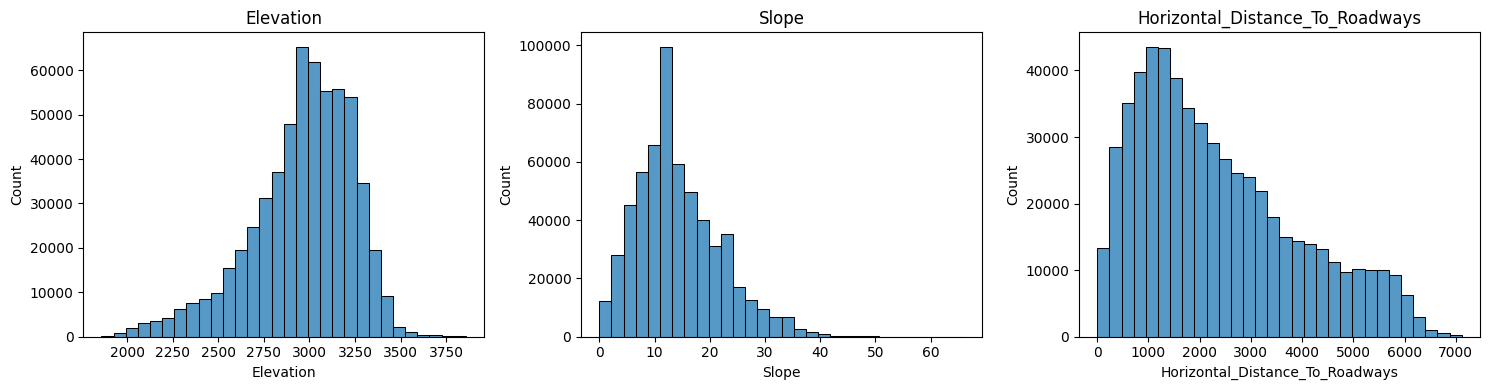

In [21]:
cols_to_plot = ["Elevation", "Slope", "Horizontal_Distance_To_Roadways"]

plt.figure(figsize=(15,4))
for i, col in enumerate(cols_to_plot, 1):
    plt.subplot(1, len(cols_to_plot), i)
    sns.histplot(df[col], bins=30, kde=False)
    plt.title(col)
plt.tight_layout()
plt.show()

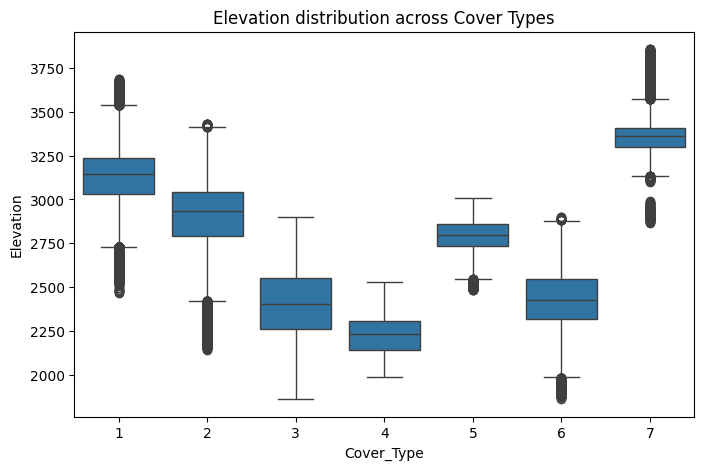

In [23]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x=target_col, y="Elevation")
plt.title("Elevation distribution across Cover Types")
plt.show()

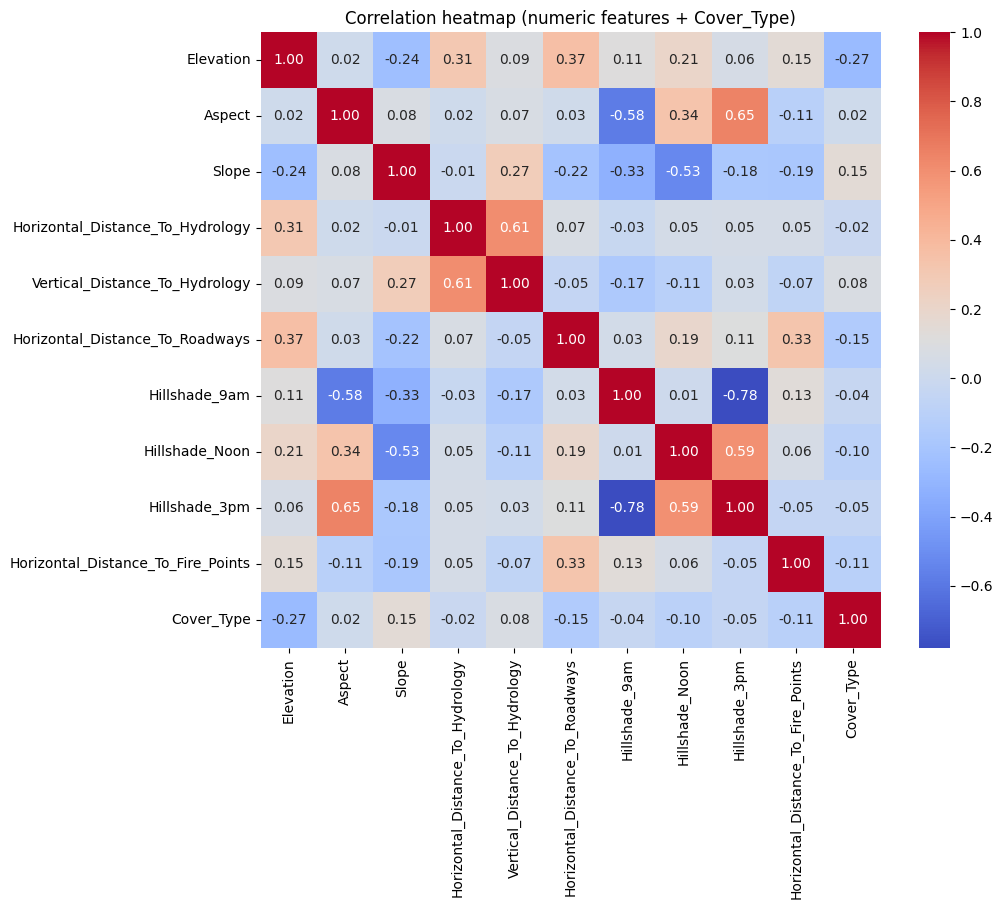

In [24]:
corr = df[numeric_cols + [target_col]].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation heatmap (numeric features + Cover_Type)")
plt.show()

In [33]:
X = df.drop("Cover_Type", axis=1)
y = df["Cover_Type"] - 1   # convert 1–7 -> 0–6 (better for PyTorch)

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, random_state=SEED, stratify=y
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=SEED, stratify=y_temp
)

print("Train:", X_train.shape, "Val:", X_val.shape, "Test:", X_test.shape)


Train: (406708, 54) Val: (87152, 54) Test: (87152, 54)


In [34]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled   = scaler.transform(X_val)
X_test_scaled  = scaler.transform(X_test)


In [35]:
def evaluate_model(name, y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(
        y_true, y_pred, average="macro", zero_division=0
    )
    print(f"\n=== {name} ===")
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision (macro): {precision:.4f}")
    print(f"Recall (macro)   : {recall:.4f}")
    print(f"F1-score (macro) : {f1:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, zero_division=0))

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(7,6))
    sns.heatmap(cm, annot=False, fmt="d", cmap="Blues")
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    return acc, precision, recall, f1


In [36]:
results = []

In [37]:
Cs = [0.1, 1.0, 10.0]
best_lr = None
best_val_acc = -1
best_C = None

for C in Cs:
    print(f"\nTraining Logistic Regression with C={C}")
    lr = LogisticRegression(
        C=C,
        multi_class="multinomial",
        solver="lbfgs",
        max_iter=500,
        n_jobs=-1
    )
    lr.fit(X_train_scaled, y_train)

    y_val_pred = lr.predict(X_val_scaled)
    val_acc = accuracy_score(y_val, y_val_pred)
    print(f"Validation accuracy: {val_acc:.4f}")

    if val_acc > best_val_acc:
        best_val_acc = val_acc
        best_lr = lr
        best_C = C

print(f"\nBest C for Logistic Regression: {best_C} with val acc {best_val_acc:.4f}")


Training Logistic Regression with C=0.1


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Validation accuracy: 0.7237

Training Logistic Regression with C=1.0


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Validation accuracy: 0.7237

Training Logistic Regression with C=10.0


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Validation accuracy: 0.7237

Best C for Logistic Regression: 1.0 with val acc 0.7237



=== Logistic Regression ===
Accuracy : 0.7253
Precision (macro): 0.5997
Recall (macro)   : 0.5102
F1-score (macro) : 0.5321

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.70      0.71     31776
           1       0.75      0.80      0.77     42496
           2       0.67      0.79      0.73      5363
           3       0.64      0.43      0.51       412
           4       0.20      0.01      0.01      1424
           5       0.48      0.27      0.35      2605
           6       0.74      0.57      0.64      3076

    accuracy                           0.73     87152
   macro avg       0.60      0.51      0.53     87152
weighted avg       0.71      0.73      0.72     87152



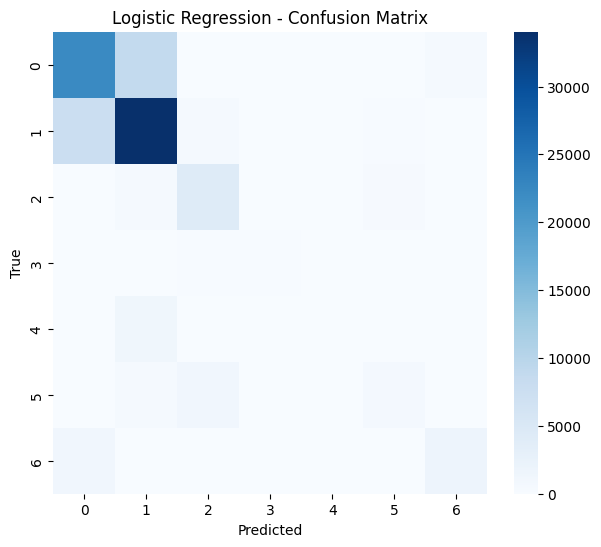

In [38]:
y_test_pred_lr = best_lr.predict(X_test_scaled)
acc, prec, rec, f1 = evaluate_model("Logistic Regression", y_test, y_test_pred_lr)

results.append(["Logistic Regression", acc, prec, rec, f1])


In [39]:
# Optional: subsample for faster training (uncomment if Colab is slow)
# sample_size = 100000
# idx = np.random.choice(len(X_train_scaled), size=sample_size, replace=False)
# X_train_svm = X_train_scaled[idx]
# y_train_svm = y_train.iloc[idx].values
# X_val_svm = X_val_scaled
# y_val_svm = y_val.values
# print("Using subset of size:", X_train_svm.shape[0])
# Otherwise, use full train:
X_train_svm = X_train_scaled
y_train_svm = y_train.values
X_val_svm   = X_val_scaled
y_val_svm   = y_val.values


In [41]:
from sklearn.svm import LinearSVC

In [42]:
Cs = [0.01, 0.1, 1.0]
best_svm = None
best_val_acc = -1
best_C = None

for C in Cs:
    print(f"\nTraining Linear SVM with C={C}")
    svm = LinearSVC(C=C, max_iter=2000)
    svm.fit(X_train_svm, y_train_svm)

    y_val_pred = svm.predict(X_val_svm)
    val_acc = accuracy_score(y_val_svm, y_val_pred)
    print(f"Validation accuracy: {val_acc:.4f}")

    if val_acc > best_val_acc:
        best_val_acc = val_acc
        best_svm = svm
        best_C = C

print(f"\nBest C for Linear SVM: {best_C} with val acc {best_val_acc:.4f}")



Training Linear SVM with C=0.01
Validation accuracy: 0.7120

Training Linear SVM with C=0.1
Validation accuracy: 0.7121

Training Linear SVM with C=1.0
Validation accuracy: 0.7122

Best C for Linear SVM: 1.0 with val acc 0.7122



=== Linear SVM ===
Accuracy : 0.7133
Precision (macro): 0.6064
Recall (macro)   : 0.4484
F1-score (macro) : 0.4574

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.69      0.70     31776
           1       0.74      0.80      0.77     42496
           2       0.61      0.86      0.72      5363
           3       0.64      0.21      0.32       412
           4       0.49      0.01      0.03      1424
           5       0.38      0.05      0.09      2605
           6       0.68      0.52      0.59      3076

    accuracy                           0.71     87152
   macro avg       0.61      0.45      0.46     87152
weighted avg       0.70      0.71      0.70     87152



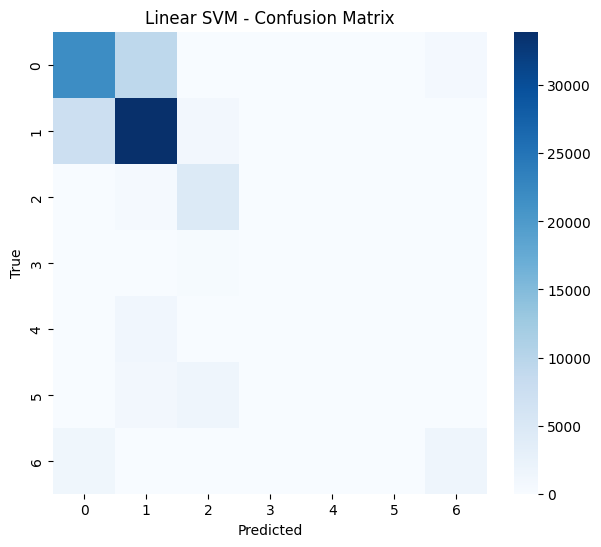

In [43]:
y_test_pred_svm = best_svm.predict(X_test_scaled)
acc, prec, rec, f1 = evaluate_model("Linear SVM", y_test, y_test_pred_svm)

results.append(["Linear SVM", acc, prec, rec, f1])

In [44]:
class TabularDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y.values if isinstance(y, pd.Series) else y, dtype=torch.long)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_ds = TabularDataset(X_train_scaled, y_train)
val_ds   = TabularDataset(X_val_scaled, y_val)
test_ds  = TabularDataset(X_test_scaled, y_test)

batch_size = 512

train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
val_loader   = DataLoader(val_ds, batch_size=batch_size, shuffle=False)
test_loader  = DataLoader(test_ds, batch_size=batch_size, shuffle=False)


In [45]:
input_dim = X_train_scaled.shape[1]
num_classes = len(np.unique(y))

class MLP(nn.Module):
    def __init__(self, input_dim, num_classes):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, num_classes)
        )

    def forward(self, x):
        return self.net(x)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = MLP(input_dim, num_classes).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)


In [46]:
def train_model(model, train_loader, val_loader, criterion, optimizer, epochs=15):
    best_val_acc = 0
    best_state = None

    train_losses, val_losses = [], []
    train_accs, val_accs = [], []

    for epoch in range(1, epochs+1):
        # ---- Train ----
        model.train()
        running_loss = 0
        correct = 0
        total = 0

        for X_batch, y_batch in train_loader:
            X_batch = X_batch.to(device)
            y_batch = y_batch.to(device)

            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * X_batch.size(0)
            _, preds = torch.max(outputs, 1)
            correct += (preds == y_batch).sum().item()
            total += y_batch.size(0)

        epoch_train_loss = running_loss / total
        epoch_train_acc = correct / total

        # ---- Validate ----
        model.eval()
        val_loss = 0
        val_correct = 0
        val_total = 0

        with torch.no_grad():
            for X_batch, y_batch in val_loader:
                X_batch = X_batch.to(device)
                y_batch = y_batch.to(device)

                outputs = model(X_batch)
                loss = criterion(outputs, y_batch)
                val_loss += loss.item() * X_batch.size(0)

                _, preds = torch.max(outputs, 1)
                val_correct += (preds == y_batch).sum().item()
                val_total += y_batch.size(0)

        epoch_val_loss = val_loss / val_total
        epoch_val_acc = val_correct / val_total

        train_losses.append(epoch_train_loss)
        val_losses.append(epoch_val_loss)
        train_accs.append(epoch_train_acc)
        val_accs.append(epoch_val_acc)

        if epoch_val_acc > best_val_acc:
            best_val_acc = epoch_val_acc
            best_state = model.state_dict()

        print(f"Epoch {epoch:02d}: "
              f"Train Loss={epoch_train_loss:.4f}, Train Acc={epoch_train_acc:.4f}, "
              f"Val Loss={epoch_val_loss:.4f}, Val Acc={epoch_val_acc:.4f}")

    # load best
    if best_state is not None:
        model.load_state_dict(best_state)

    return train_losses, val_losses, train_accs, val_accs

train_losses, val_losses, train_accs, val_accs = train_model(
    model, train_loader, val_loader, criterion, optimizer, epochs=15
)


Epoch 01: Train Loss=0.7239, Train Acc=0.7005, Val Loss=0.5945, Val Acc=0.7470
Epoch 02: Train Loss=0.6020, Train Acc=0.7431, Val Loss=0.5447, Val Acc=0.7643
Epoch 03: Train Loss=0.5683, Train Acc=0.7540, Val Loss=0.5200, Val Acc=0.7713
Epoch 04: Train Loss=0.5499, Train Acc=0.7622, Val Loss=0.4952, Val Acc=0.7827
Epoch 05: Train Loss=0.5342, Train Acc=0.7684, Val Loss=0.4829, Val Acc=0.7914
Epoch 06: Train Loss=0.5236, Train Acc=0.7729, Val Loss=0.4678, Val Acc=0.8006
Epoch 07: Train Loss=0.5132, Train Acc=0.7776, Val Loss=0.4593, Val Acc=0.8070
Epoch 08: Train Loss=0.5061, Train Acc=0.7812, Val Loss=0.4482, Val Acc=0.8063
Epoch 09: Train Loss=0.4994, Train Acc=0.7849, Val Loss=0.4407, Val Acc=0.8088
Epoch 10: Train Loss=0.4921, Train Acc=0.7874, Val Loss=0.4330, Val Acc=0.8173
Epoch 11: Train Loss=0.4878, Train Acc=0.7892, Val Loss=0.4271, Val Acc=0.8204
Epoch 12: Train Loss=0.4841, Train Acc=0.7916, Val Loss=0.4227, Val Acc=0.8222
Epoch 13: Train Loss=0.4798, Train Acc=0.7935, Val L

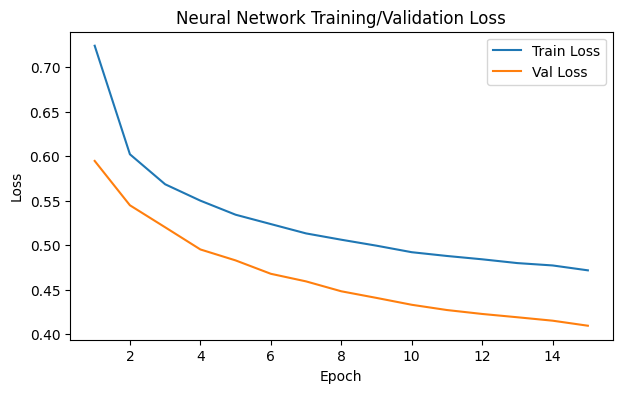

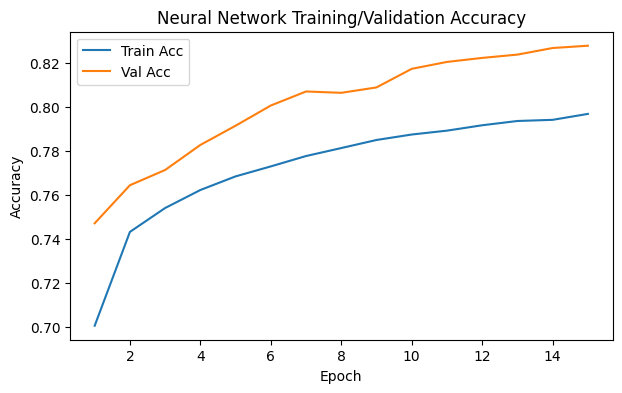

In [47]:
epochs = range(1, len(train_losses)+1)

plt.figure(figsize=(7,4))
plt.plot(epochs, train_losses, label="Train Loss")
plt.plot(epochs, val_losses, label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Neural Network Training/Validation Loss")
plt.legend()
plt.show()

plt.figure(figsize=(7,4))
plt.plot(epochs, train_accs, label="Train Acc")
plt.plot(epochs, val_accs, label="Val Acc")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Neural Network Training/Validation Accuracy")
plt.legend()
plt.show()



=== Neural Network (PyTorch) ===
Accuracy : 0.8271
Precision (macro): 0.7949
Recall (macro)   : 0.6782
F1-score (macro) : 0.7113

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.79      0.82     31776
           1       0.83      0.89      0.86     42496
           2       0.75      0.90      0.81      5363
           3       0.78      0.58      0.66       412
           4       0.80      0.29      0.42      1424
           5       0.72      0.44      0.55      2605
           6       0.85      0.87      0.86      3076

    accuracy                           0.83     87152
   macro avg       0.79      0.68      0.71     87152
weighted avg       0.83      0.83      0.82     87152



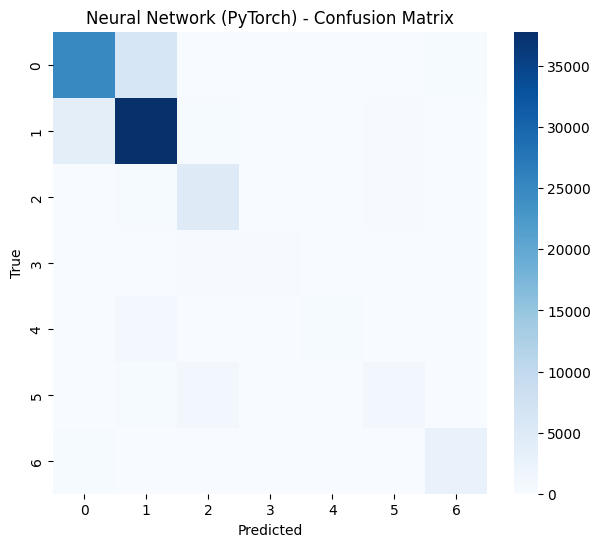

In [48]:
model.eval()
all_preds = []
all_targets = []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch = X_batch.to(device)
        outputs = model(X_batch)
        _, preds = torch.max(outputs, 1)

        all_preds.extend(preds.cpu().numpy())
        all_targets.extend(y_batch.numpy())

all_preds = np.array(all_preds)
all_targets = np.array(all_targets)

acc, prec, rec, f1 = evaluate_model("Neural Network (PyTorch)", all_targets, all_preds)

results.append(["Neural Network", acc, prec, rec, f1])


In [50]:
results_df = pd.DataFrame(
    results,
    columns=["Model", "Accuracy", "Precision_macro", "Recall_macro", "F1_macro"]
)
results_df


,Model,Accuracy,Precision_macro,Recall_macro,F1_macro
0,Logistic Regression,0.725262,0.599705,0.510181,0.532129
1,Linear SVM,0.713294,0.606412,0.448399,0.457397
2,Neural Network,0.827130,0.794855,0.678155,0.711277


In [51]:
results_df.sort_values(by="Accuracy", ascending=False)


,Model,Accuracy,Precision_macro,Recall_macro,F1_macro
2,Neural Network,0.827130,0.794855,0.678155,0.711277
0,Logistic Regression,0.725262,0.599705,0.510181,0.532129
1,Linear SVM,0.713294,0.606412,0.448399,0.457397
